# Final Project

In [1]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

### 獲取歷史資料

In [2]:
from finlab.data import Data
#from finlab.ml import fundamental_features
#fdf = fundamental_features()

data = Data()

close = data.get("收盤價")
open_ = data.get("開盤價")
high = data.get("最高價")
low = data.get("最低價")
vol = data.get("成交股數")

PB = data.get("股價淨值比")
pe = data.get("本益比")

#bi = data.get("營業利益")


#close = data.get_adj("收盤價").round(2)

#財務指標
rev = data.get("當月營收")
l_rev = data.get("去年當月營收")

#t123 = data.get('土地')

bargin_i=data.get("投信買賣超股數")/data.get("成交股數")
bargin_f=data.get("外資自營商買賣超股數")/data.get("成交股數")
bargin_s=data.get("自營商買賣超股數(自行買賣)")/data.get("成交股數")
#

vol=data.get('成交股數')/1000
vol_ma5=vol.rolling(5).mean()

rev.index = rev.index.shift(5, "d")         #每月頻率
#周頻率

### 計算features

In [3]:
#MFI  = data.talib("MFI")
##MFI.tail()
#ub,mb,lb =data.talib("BBANDS")

#### 營收相關

In [4]:
##############################################　　　自己加入的　　　##############################################
import pandas as pd
from finlab.__init__ import talib_all_stock
from talib import abstract

In [5]:
def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min() 
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

def yoy(n):
    return (rev.shift(n) / rev.shift(12+n)) -1

def bi(n):
    return bargin_i/bargin_i.rolling(n).mean()

def bf(n):
    return bargin_f/bargin_f.rolling(n).mean()
    
def bs(n):
    return bargin_s/bargin_s.rolling(n).mean()

#-------------------------------------------

features = {
    #'mom1': mom(1),
    #'mom2': mom(2),
    'mom3': mom(3),
    #'mom4': mom(4),
    #'mom5': mom(5),
    'mom6': mom(6),
    #'mom7': mom(7),
    #'mom8': mom(8),
    #'mom9': mom(9),

    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
###############################################
    'yoy': yoy(1),
    'delta_yoy':yoy(1)-yoy(2),
    
    'PB':PB,
    'PE':pe,  
    
   #'bi5' : bi(5),
   #'bi10' : bi(10),
   #'bi20' : bi(20),
   #'bi60' : bi(60),
   # 
   #'bf5' : bf(5),
   # #'bf10' : bf(10),
   # #'bf20' : bf(20),
   # #'bf60' : bf(60),
   # 
   # 'bs5' : bs(5),
   # 'bs10' : bs(10),
   # 'bs20' : bs(20),
   # 'bs60' : bs(60),
    
}


In [6]:
#bi(60).dropna(how='all')

#### 財報指標

兩個feature結合[[連結網址]](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d18b63eac23d80020ae4ce7)

---
```python
from finlab import ml
from finlab.data import Data

data = Data()
rsi = data.talib("RSI")

dataset = ml.fundamental_features()
ml.add_feature(dataset, 'RSI', rsi)
```

In [7]:
from finlab.ml import fundamental_features
dataset_fundamental = fundamental_features()

In [8]:
dataset_fundamental

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2013-05-15  2026729.0   2274053.0     1911110.0  1571884.0   
         2013-08-14  4588992.0   6029953.0      949640.0  1543041.0   
         2013-11-14  5910634.0   5168764.0     5025600.0  1605424.0   
         2014-03-31  5249620.0   8500835.0     6450131.0  2118671.0   
         2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
...                        ...         ...           ...        ...   
9962     2021-05-15     8016.0    149610.0        6847.0     5027.0   
         2021-08-14    40404.0   -155514.0       41534.0     4813.0   
         2021-11-14    48861.0   -435827.0       42439.0     4855.0   
         2022-03-31    66532.0     74308.0       57469.0     4541.0   
         2022-05-15    44919.0    304147.0       39436.0     4397.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2013-05-15  77246355.0  65913019.0        -211456.0    1999624.0   
         2013-08-14  77139390.0  68971246.0       -1033541.0    3802105.0   
         2013-11-14  77212043.0  73733391.0        -470935.0    5344662.0   
         2014-03-31  87788055.0  70398494.0       -1089134.0    3972292.0   
         2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
...                         ...         ...              ...          ...   
9962     2021-05-15    699386.0     76254.0          -3081.0       6607.0   
         2021-08-14    976044.0    274123.0          -2374.0      37397.0   
         2021-11-14   1420059.0    671731.0          -4677.0      40088.0   
         2022-03-31   1413495.0    581642.0          -8826.0      56074.0   
         2022-05-15   1217003.0    352094.0          -1292.0      37016.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...  R409_淨值成長率   R501_流動比率  \
stock_id date                                    ...                           
1101     2013-05-15           NaN           NaN  ...         NaN  117.194382   
         2013-08-14     -1.233843      0.944284  ...         NaN  111.842825   
         2013-11-14     -1.130208      2.481737  ...         NaN  104.717879   
         2014-03-31     -0.339410      3.102975  ...         NaN  124.701609   
         2014-05-15     -1.732411      1.630076  ...    8.866880  123.837828   
...                           ...           ...  ...         ...         ...   
9962     2021-05-15      0.618888      0.636208  ...    1.131801  917.179427   
         2021-08-14      3.243048      3.596651  ...    7.003658  356.060601   
         2021-11-14      2.691891      2.839898  ...   11.206472  211.402928   
         2022-03-31      3.352989      3.383973  ...   15.804715  243.018042   
         2022-05-15      2.371942      2.484802  ...   19.138403  345.647185   

                      R502_速動比率  R503_利息支出率   R678_營運資金  R607_總資產週轉次數  \
stock_id date                                                           
1101     2013-05-15   83.137456   -8.186859  11333336.0           NaN   
         2013-08-14   79.609613  -13.298556   8168144.0      0.104927   
         2013-11-14   83.502774  -17.083477   3478652.0      0.110355   
         2014-03-31  102.946688  -32.624816  17389561.0      0.119738   
         2014-05-15  101.776758   -9.792979  17732671.0      0.093998   
...                         ...         ...         ...           ...   
9962     2021-05-15  271.866394    1.005915    623132.0      0.380922   
         2021-08-14  110.054975    0.178902    701921.0      0.594034   
         2021-11-14   27.425413    0.432543    748328.0      0.428734   
         2022-03-31   39.386083    1.907177    831853.0      0.503416   
         2022-05-15   85.204235    2.087938    864909.0      0.525429   

                     R610_存貨週轉率  R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量  
stock_id date                

#### 技術指標

加入其他features
* http://finlabcourse.imotor.com/viewthread.php?tid=660&extra=page%3D1

```python
from finlab import ml
from finlab.data import Data

data = Data()
rsi = data.talib("RSI")

dataset = ml.fundamental_features()
ml.add_feature(dataset, 'RSI', rsi)
```

#### 組合dataset

In [9]:
import pandas as pd

#### 確認各指標清單

In [10]:
#t1 = data.talib("NATR",timeperiod=14)
#t1.to_csv('myfile.csv')

### 製作dataset

##### 設定買賣頻率

In [11]:
#rev.index = rev.index.tz_localize("Asia/Taipei")
every_month = rev.index
every_month

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-02-15', '2022-03-15', '2022-04-15', '2022-05-15',
               '2022-06-15', '2022-07-15', '2022-08-15', '2022-09-15',
               '2022-10-15', '2022-11-15'],
              dtype='datetime64[ns]', name='date', length=214, freq=None)

#### 將dataframe 組裝起來

In [12]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [13]:
for name, f in features.items():
    features[name] = f.unstack()

In [14]:
import pandas as pd
dataset = pd.DataFrame(features)

In [15]:
feature_names = list(dataset.columns)

In [16]:
from finlab import ml
ml.add_feature(dataset, 'vol_ma5', vol_ma5)
dataset

mom3      mom6     bias5    bias10    bias20  \
stock_id date                                                           
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN   
         2005-03-15       NaN       NaN       NaN       NaN       NaN   
         2005-04-15       NaN       NaN       NaN       NaN       NaN   
         2005-05-15       NaN       NaN       NaN       NaN       NaN   
         2005-06-15       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
9962     2022-07-15  1.435387  0.729493  0.996885  1.017488  0.979155   
         2022-08-15  0.678559  0.859901  1.042199  1.058785  1.073781   
         2022-09-15  0.917472  1.209077  1.022514  1.071429  1.058081   
         2022-10-15  1.694666  1.435387  0.956989  0.919105  0.893126   
         2022-11-15  0.641536  0.678559  1.024242  1.041282  1.095979   

                       bias60   bias120   bias240      acc5     acc10  ...  \
stock_id date                                                          ...   
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-03-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-04-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-05-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-06-15       NaN       NaN       NaN       NaN       NaN  ...   
...                       ...       ...       ...       ...       ...  ...   
9962     2022-07-15  0.799251  0.742765  0.716761  1.004000  0.865248  ...   
         2022-08-15  1.090909  0.957462  0.940622  0.954899  1.063758  ...   
         2022-09-15  1.119352  0.988264  0.968757  0.922099  0.934985  ...   
         2022-10-15  0.875649  0.862589  0.800230  1.094812  0.983165  ...   
         2022-11-15  1.112330  1.124262  1.020365  0.998464  1.019544  ...   

                       rsv10     rsv20     rsv60    rsv120    rsv240  \
stock_id date                                                          
0015     2005-02-15      NaN       NaN       NaN       NaN       NaN   
         2005-03-15      NaN       NaN       NaN       NaN       NaN   
         2005-04-15      NaN       NaN       NaN       NaN       NaN   
         2005-05-15      NaN       NaN       NaN       NaN       NaN   
         2005-06-15      NaN       NaN       NaN       NaN       NaN   
...                      ...       ...       ...       ...       ...   
9962     2022-07-15  0.73913  0.303571  0.097143  0.075556  0.062271   
         2022-08-15  1.00000  1.000000  0.820755  0.386667  0.386667   
         2022-09-15  1.00000  1.000000  1.000000  0.391111  0.391111   
         2022-10-15  0.18750  0.142857  0.130435  0.198582  0.124444   
         2022-11-15  1.00000  1.000000  1.000000  0.933962  0.440000   

                          yoy  delta_yoy    PB    PE   vol_ma5  
stock_id date                                                   
0015     2005-02-15       NaN        NaN   NaN   NaN       NaN  
         2005-03-15       NaN        NaN   NaN   NaN       NaN  
         2005-04-15       NaN        NaN   NaN   NaN       NaN  
         2005-05-15       NaN        NaN   NaN   NaN       NaN  
         2005-06-15       NaN        NaN   NaN   NaN       NaN  
...                       ...        ...   ...   ...       ...  
9962     2022-07-15  0.065046  -0.495829  1.03  6.77  368.6656  
         2022-08-15  0.240544   0.175498  1.35  7.48  818.5636  
         2022-09-15  0.286455   0.045911  1.35  7.50  825.8902  
         2022-10-15  0.725788   0.439333  1.10  6.12  638.6044  
         2022-11-15  0.003516  -0.722271  1.33  7.01  462.1834  

[436988 rows x 25 columns]

In [17]:
##############################################　　　自己加入的　　　##############################################
dataset.index = dataset.index.set_names(['stock_id','date'], level=[0,1])


#dataset.index.levels[1].name = 'date'
#dataset.index.levels[0].name = 'stock_id'

#因為你pandas更新到新版了
## profit.index.levels[0].name = 'year'
## profit.index.levels[1].name = 'month'
#這兩行的語法被棄用，請改成
#profit.index=profit.index.set_names('year', level=0)
#profit.index=profit.index.set_names('month', level=1)
#or profit.index=profit.index.set_names(['year','month'], level=[0,1])
#直接一行
#就可以了

In [18]:
dataset_fundamental.reindex(dataset.index).dropna()

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
         2015-05-15  1693508.0   5654152.0      349121.0  1711428.0   
         2016-05-15   483889.0   5608258.0     -333525.0  1723452.0   
         2017-05-15  1941630.0   1408140.0      993546.0  1530197.0   
         2018-05-15  4650691.0   2233014.0     8436811.0  1532636.0   
...                        ...         ...           ...        ...   
9955     2018-05-15   -44412.0     -2404.0      -43333.0    16052.0   
         2019-05-15     4525.0     66950.0        8798.0    15017.0   
         2020-05-15   -55371.0    -14402.0      -50396.0    13018.0   
         2021-05-15   -14190.0    -36705.0      -23126.0    13085.0   
         2022-05-15   -18487.0     98428.0      -10926.0    14456.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
         2015-05-15  92471096.0  69579858.0        -818460.0     974518.0   
         2016-05-15  78482102.0  64818835.0       -1499102.0      94527.0   
         2017-05-15  76640360.0  55787736.0        -134877.0    1163708.0   
         2018-05-15  75261374.0  53357480.0       -1115614.0    2865370.0   
...                         ...         ...              ...          ...   
9955     2018-05-15   1236034.0    796588.0           -560.0     -45317.0   
         2019-05-15    984072.0    760451.0          -3069.0       5271.0   
         2020-05-15    982420.0    841152.0          -5896.0     -48927.0   
         2021-05-15    905765.0    937218.0         -28012.0     -22146.0   
         2022-05-15    832282.0    829339.0         -16375.0     -15584.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...  R409_淨值成長率   R501_流動比率  \
stock_id date                                    ...                           
1101     2014-05-15     -1.732411      1.630076  ...    8.866880  123.837828   
         2015-05-15     -2.315297      0.069454  ...    2.505042  132.899231   
         2016-05-15     -2.791650     -0.256684  ...   -4.604373  121.079162   
         2017-05-15     -2.558880      0.057603  ...   -4.653916  137.378509   
         2018-05-15      1.186485      3.015032  ...   12.344125  141.051215   
...                           ...           ...  ...         ...         ...   
9955     2018-05-15     -1.221556     -1.261243  ...   -4.798625  155.166033   
         2019-05-15      0.278277      0.284446  ...  -11.507622  129.406365   
         2020-05-15     -1.545101     -1.698205  ...   -3.179062  116.794586   
         2021-05-15     -0.672387     -0.794341  ...   -5.731071   96.644004   
         2022-05-15     -0.425360     -0.378016  ...   -5.407716  100.354861   

                      R502_速動比率  R503_利息支出率   R678_營運資金  R607_總資產週轉次數  \
stock_id date                                                           
1101     2014-05-15  101.776758   -9.792979  17732671.0      0.093998   
         2015-05-15  109.303861   -7.153186  22891238.0      0.073611   
         2016-05-15   97.448632   -6.324010  13663267.0      0.061984   
         2017-05-15  113.578196   -7.329636  20852624.0      0.080450   
         2018-05-15  112.579035   16.342285  21903894.0      0.087031   
...                         ...         ...         ...           ...   
9955     2018-05-15   32.058354   -9.963928    439446.0      0.121118   
         2019-05-15   41.352960   48.441821    223621.0      0.142300   
         2020-05-15   44.527386   -8.378877    141268.0      0.130004   
         2021-05-15   27.735383  -16.401733    -31453.0      0.157824   
         2022-05-15   37.994475  -33.446122      2943.0      0.132195   

                     R610_存貨週轉率  R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量  
stock_id date                

data[組合](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d18b63eac23d80020ae4ce7)
```python
new_df = pd.concat([dataset_fundamental['R406_經常利益成長率'],dataset],axis=1).dropna(how='any')
```

In [19]:
#3new_df = pd.concat([dataset_fundamental,dataset],axis=1).dropna(how='any')
#3dataset1 = new_df.fillna(method='ffill')#[(new_df.index.get_level_values('stock_id')=='2330')]
#3#dataset = dataset1

In [20]:
feature_names_fundamental=list(dataset_fundamental.columns)
#feature_names_fundamental

### 新增 label(績效/排名)
 - 定義一下要比績效還是要比排名

In [21]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)
################################
ml.add_profit_prediction(dataset_fundamental)
ml.add_rank_prediction(dataset_fundamental)

In [22]:
#profit(return) rank
predi_target = 'rank'

### 刪除太大太小的歷史資料

In [23]:
print(dataset.shape)

def drop_extreme_case(dataset, feature_names, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset.index)
    for f in feature_names:
        tf = dataset[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset = dataset[~extreme_cases]
    return dataset

dataset_drop_extreme_case = drop_extreme_case(dataset , feature_names , thresh=0.01)

print(dataset_drop_extreme_case.shape)

print('---------------------------------')

print(dataset_fundamental.shape)
dataset_drop_extreme_case_fundamental = drop_extreme_case(dataset_fundamental , feature_names_fundamental , thresh=0.01)
print(dataset_drop_extreme_case_fundamental.shape)


##(436774, 25)
##(388157, 25)

(436988, 27)
(385962, 27)
---------------------------------
(69153, 50)
(51557, 50)


In [24]:
dataset_dropna = dataset_drop_extreme_case.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

dataset_dropna_fundamental = dataset_drop_extreme_case_fundamental.dropna(how='any')
dataset_dropna_fundamental = dataset_dropna_fundamental.reset_index().set_index("date")

In [25]:
#dataset_drop_extreme_case.index.get_level_values("date")

In [26]:
##################################################################################################################
##############################################　　　自己加入的　　　##############################################
##################################################################################################################

dataset_dropna.index = pd.to_datetime(dataset_dropna.index)
dataset_dropna = dataset_dropna.sort_index()

dataset_dropna_fundamental.index = pd.to_datetime(dataset_dropna_fundamental.index)
dataset_dropna_fundamental = dataset_dropna_fundamental.sort_index()

#修復＜class ‘numpy.ndarray‘＞　https://blog.csdn.net/lxbin/article/details/114005757

## Split Train Test dataset

In [27]:
dataset_train = dataset_dropna[:'2020']
dataset_test = dataset_dropna['2021':]

dataset_train_fundamental = dataset_dropna_fundamental[:'2020']
dataset_test_fundamental = dataset_dropna_fundamental['2021':]
#date_arr = dataset.index.get_level_values('date') < '2020'
#dataset_train = dataset[date_arr]
#dataset_test = dataset[~date_arr]

In [28]:
train = dataset_train[feature_names] , dataset_train['return'] > 1
test = dataset_test[feature_names] , dataset_test['return'] > 1 

train_fundamental = dataset_train_fundamental[feature_names_fundamental] , dataset_train_fundamental['return'] > 1
test_fundamental = dataset_test_fundamental[feature_names_fundamental] , dataset_test_fundamental['return'] > 1 

### 機器學習
 - 目前只有三個，技術指標也要再增加一下feature_names

In [29]:
#feature_names = feature_names1

In [30]:
#dataset_train.index

#### keras

In [31]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

import os


os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = keras.models.Sequential()
model.add(layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              optimizer="adam",)

print('start fitting')
history = model.fit(dataset_train[feature_names], dataset_train[predi_target],
                    batch_size=1000,         #1000  #每一个batch的大小
                    epochs=225, #225          #迭代次数
                    verbose=1,
                    validation_split=0.1,
                    #validation_data =        #(测试集的输入特征，测试集的标签），
                    #validation_split =       # 从测试集中划分多少比例给训练集，
                    #validation_freq = 20        #测试的epoch间隔数                     
                   )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 12,701
Trainable params: 12,701
Non-trainable params: 0
_________________________________________________________________
start fitting
Epoch 1/225
105/105 [==============================] - ETA: 0s - loss: 0.282 - ETA: 0s - loss: 0.263 - ETA: 0s - loss: 0.247 - ETA: 0s - loss: 0.222 - ETA: 0s - loss: 0.191 - ETA: 0s - loss: 0.167 - ETA: 0s - loss: 0.151 - ETA: 0s - los

##### 結果

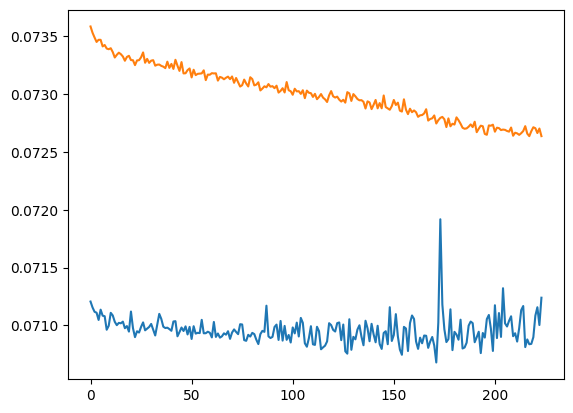

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

#### lightgbm Model

In [33]:
##############################################　　　自己加入的　　　##############################################
import lightgbm as lgb

cf = lgb.LGBMRegressor(n_estimators=5000)

print('---cf.fit---')
print(cf.fit(*train_fundamental))
print('---cf.score---')
print(cf.score(*test_fundamental))
print('---predict---')
print(cf.predict(test_fundamental[0]))

---cf.fit---
LGBMRegressor(n_estimators=5000)
---cf.score---
-0.1685593943633914
---predict---
[0.63502639 0.65948009 0.69755121 ... 0.70823892 0.38495753 0.72908487]


##### 參數優化_1110

In [34]:
#import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test_fundamental],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [35]:
gs.fit(*train_fundamental, **fit_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[17]	valid's auc: 0.488607
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.503346
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[35]	valid's auc: 0.530157
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.494526
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.501638
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[2]	valid's auc: 0.534092
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds.
Early stopping, b

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(metric='None', n_estimators=5000,
                                            n_jobs=4, random_state=314),
                   n_iter=100,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D091D53FC8>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D091D53588>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D091D53448>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
         

In [36]:
gs.best_estimator_

LGBMClassifier(colsample_bytree=0.5492389318038391, metric='None',
               min_child_samples=398, min_child_weight=1e-05, n_estimators=5000,
               n_jobs=4, num_leaves=13, random_state=314, reg_alpha=50,
               reg_lambda=20, subsample=0.4448969770161205)

In [37]:
gs.best_score_

0.5537414140525183

In [38]:
#
#gs.best_estimator_
#LGBMClassifier(colsample_bytree=0.6433117836032942, metric='None',
#               min_child_samples=224, min_child_weight=1e-05, n_estimators=5000,
#               n_jobs=4, num_leaves=20, random_state=314, reg_alpha=10,
#               reg_lambda=10, subsample=0.8945613420997809)

In [65]:
cf = lgb.LGBMRegressor(colsample_bytree=0.5492389318038391, metric='None',
               min_child_samples=398, min_child_weight=1e-05, n_estimators=5000,
               n_jobs=4, num_leaves=13, random_state=314, reg_alpha=50,
               reg_lambda=20, subsample=0.4448969770161205)

cf.fit(dataset_train_fundamental[feature_names_fundamental],dataset_train_fundamental['return'] > 1, **fit_params)
cf.score(dataset_test_fundamental[feature_names_fundamental],dataset_test_fundamental['return'] > 1)

Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.518336


-0.014743857884052414

In [68]:
#pd.DataFrame(cf.feature_importances_,index=feature_names_fundamental)

<AxesSubplot:xlabel='Value', ylabel='Feature'>

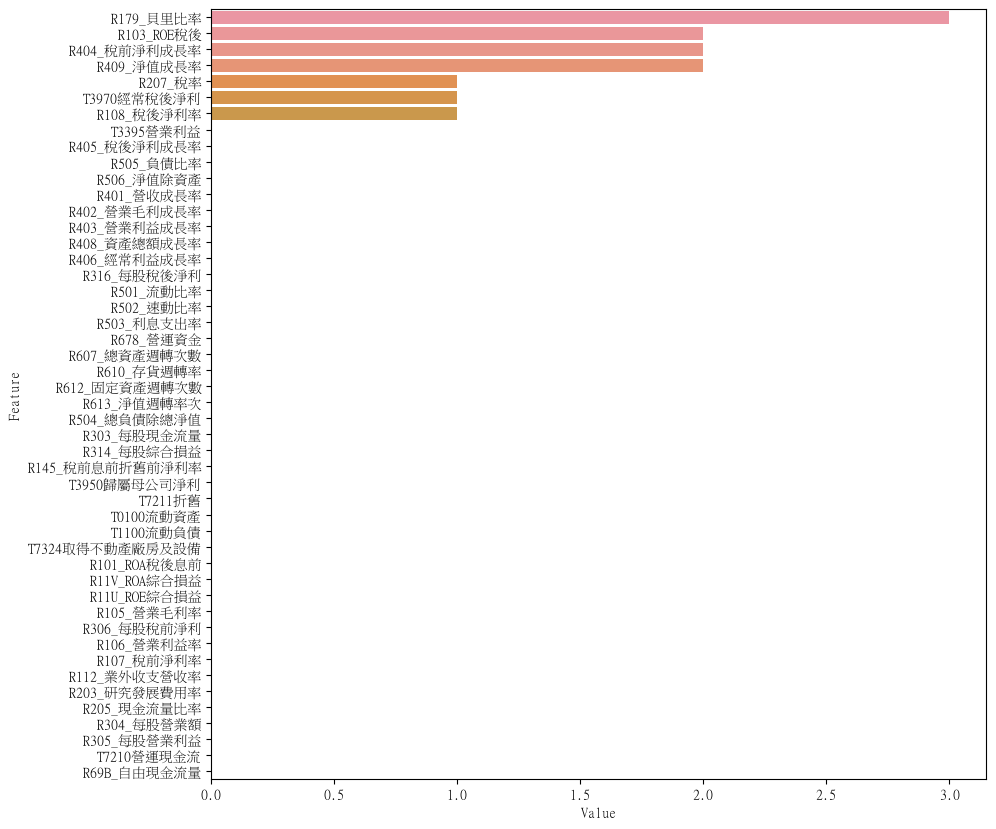

In [67]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names_fundamental), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [42]:
#print(cf.fit(*train))

In [43]:
#import lightgbm as lgb
#gbm = lgb.LGBMClassifier(n_estimators=100, random_state=5, learning_rate=0.01)
#gbm.fit(dataset_train[feature_names], dataset_train['return'] > 1)

In [44]:
#import tqdm
#
#n = 3
#
#X = []
#y = []
#indexes = []
#dataset_scaled_x = dataset_scaled[feature_names]
#
#for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-n)):
#    X.append(dataset_scaled_x.iloc[i:i+n].values)
#    y.append(dataset_scaled['return'].iloc[i+n-1])
#    indexes.append(dataset_scaled.index[i+n-1])
##dataset_scaled.head()

In [45]:
#import numpy as np
#X = np.array(X)
#y = np.array(y)

In [46]:
##import lightgbm as lgb
#cf = lgb.LGBMRegressor(colsample_bytree=0.7740467183023685, metric='None',
#               min_child_samples=395, min_child_weight=0.01, n_estimators=5000,
#               n_jobs=4, num_leaves=9, random_state=314, reg_alpha=5,
#               reg_lambda=10, subsample=0.4643892520208455)
#    
#cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

#### Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train_fundamental[feature_names_fundamental].astype(float), dataset_train_fundamental[predi_target])  

RandomForestRegressor()

##### 參數優化_1110

In [48]:
#from scipy.stats import randint as sp_randint 
#from sklearn.model_selection import RandomizedSearchCV 
## build a classifier 
#clf = RandomForestRegressor(n_estimators=100) 
## specify parameters and distributions to sample from 
#param_dist = {"max_depth": [3, None], 
#              "max_features": sp_randint(1, 11), 
#              "min_samples_split": sp_randint(2, 11), 
#              "min_samples_leaf": sp_randint(1, 11), 
#              "bootstrap": [True, False], 
#              "criterion": ["mse", "mae"]} 
## run randomized search 
#n_iter_search = 20 
#rs = RandomizedSearchCV(clf, param_distributions=param_dist, 
#                                   n_iter=n_iter_search) 

In [49]:
#rs.fit(dataset_train[features], dataset_train['return'] > 1)

plt.rcParams['font.sans-serif'] = 'mingliu'
plt.rcParams['axes.unicode_minus'] = False##### Split Train Test dataset

In [50]:
plt.rcParams['font.sans-serif'] = 'mingliu'
plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='Value', ylabel='Feature'>

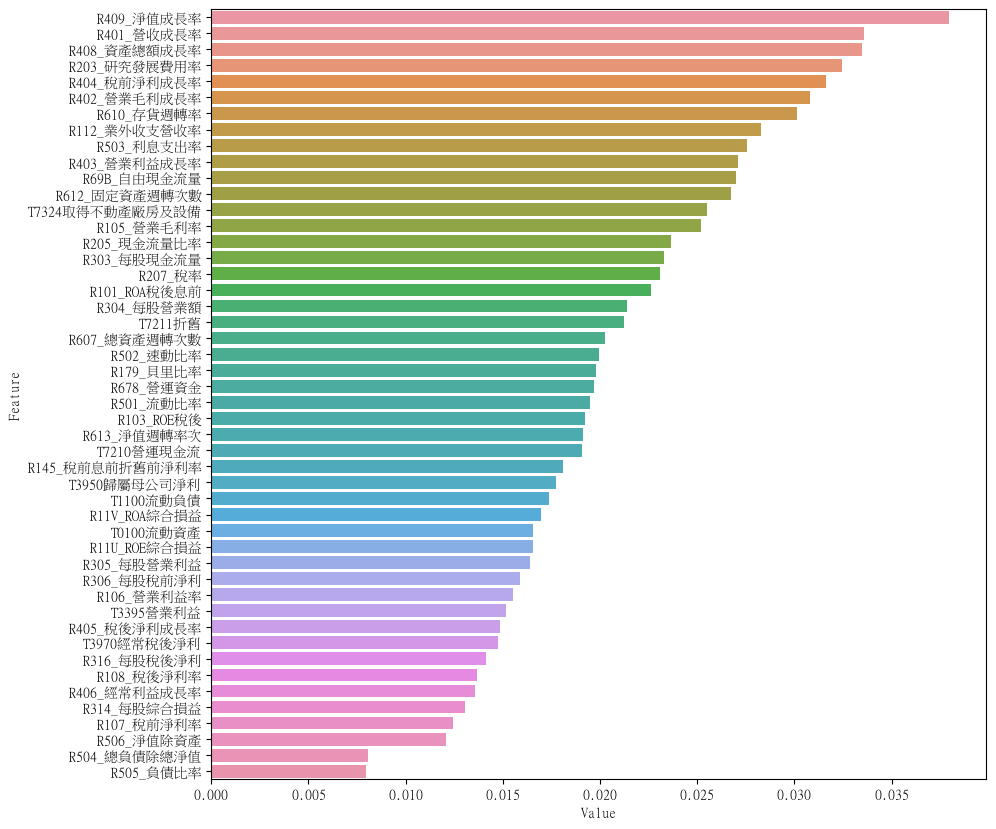

In [63]:
feature_imp = pd.DataFrame(zip(cf2.feature_importances_, feature_names_fundamental), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [52]:
dataset

mom3      mom6     bias5    bias10    bias20  \
stock_id date                                                           
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN   
         2005-03-15       NaN       NaN       NaN       NaN       NaN   
         2005-04-15       NaN       NaN       NaN       NaN       NaN   
         2005-05-15       NaN       NaN       NaN       NaN       NaN   
         2005-06-15       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
9962     2022-07-15  1.435387  0.729493  0.996885  1.017488  0.979155   
         2022-08-15  0.678559  0.859901  1.042199  1.058785  1.073781   
         2022-09-15  0.917472  1.209077  1.022514  1.071429  1.058081   
         2022-10-15  1.694666  1.435387  0.956989  0.919105  0.893126   
         2022-11-15  0.641536  0.678559  1.024242  1.041282  1.095979   

                       bias60   bias120   bias240      acc5     acc10  ...  \
stock_id date                                                          ...   
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-03-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-04-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-05-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-06-15       NaN       NaN       NaN       NaN       NaN  ...   
...                       ...       ...       ...       ...       ...  ...   
9962     2022-07-15  0.799251  0.742765  0.716761  1.004000  0.865248  ...   
         2022-08-15  1.090909  0.957462  0.940622  0.954899  1.063758  ...   
         2022-09-15  1.119352  0.988264  0.968757  0.922099  0.934985  ...   
         2022-10-15  0.875649  0.862589  0.800230  1.094812  0.983165  ...   
         2022-11-15  1.112330  1.124262  1.020365  0.998464  1.019544  ...   

                        rsv60    rsv120    rsv240       yoy  delta_yoy    PB  \
stock_id date                                                                  
0015     2005-02-15       NaN       NaN       NaN       NaN        NaN   NaN   
         2005-03-15       NaN       NaN       NaN       NaN        NaN   NaN   
         2005-04-15       NaN       NaN       NaN       NaN        NaN   NaN   
         2005-05-15       NaN       NaN       NaN       NaN        NaN   NaN   
         2005-06-15       NaN       NaN       NaN       NaN        NaN   NaN   
...                       ...       ...       ...       ...        ...   ...   
9962     2022-07-15  0.097143  0.075556  0.062271  0.065046  -0.495829  1.03   
         2022-08-15  0.820755  0.386667  0.386667  0.240544   0.175498  1.35   
         2022-09-15  1.000000  0.391111  0.391111  0.286455   0.045911  1.35   
         2022-10-15  0.130435  0.198582  0.124444  0.725788   0.439333  1.10   
         2022-11-15  1.000000  0.933962  0.440000  0.003516  -0.722271  1.33   

                       PE   vol_ma5    return      rank  
stock_id date                                            
0015     2005-02-15   NaN       NaN  1.000000  0.500416  
         2005-03-15   NaN       NaN  1.000000  0.500416  
         2005-04-15   NaN       NaN  1.000000  0.500416  
         2005-05-15   NaN       NaN  1.000000  0.500416  
         2005-06-15   NaN       NaN  1.000000  0.500416  
...                   ...       ...       ...       ...  
9962     2022-07-15  6.77  368.6656  1.256705  0.956847  
         2022-08-15  7.48  818.5636  0.987805  0.425145  
         2022-09-15  7.50  825.8902  0.848765  0.269030  
         2022-10-15  6.12  638.6044  1.229091  0.959326  
         2022-11-15  7.01  462.1834       NaN       NaN  

[436988 rows x 27 columns]

In [340]:
dataset['yoy']

stock_id  date      
0015      2005-02-15         NaN
          2005-03-15         NaN
          2005-04-15         NaN
          2005-05-15         NaN
          2005-06-15         NaN
                          ...   
9962      2022-07-15    0.065046
          2022-08-15    0.240544
          2022-09-15    0.286455
          2022-10-15    0.725788
          2022-11-15    0.003516
Name: yoy, Length: 436988, dtype: float64

In [71]:
dataset_fundamental

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2013-05-15  2026729.0   2274053.0     1911110.0  1571884.0   
         2013-08-14  4588992.0   6029953.0      949640.0  1543041.0   
         2013-11-14  5910634.0   5168764.0     5025600.0  1605424.0   
         2014-03-31  5249620.0   8500835.0     6450131.0  2118671.0   
         2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
...                        ...         ...           ...        ...   
9962     2021-05-15     8016.0    149610.0        6847.0     5027.0   
         2021-08-14    40404.0   -155514.0       41534.0     4813.0   
         2021-11-14    48861.0   -435827.0       42439.0     4855.0   
         2022-03-31    66532.0     74308.0       57469.0     4541.0   
         2022-05-15    44919.0    304147.0       39436.0     4397.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2013-05-15  77246355.0  65913019.0        -211456.0    1999624.0   
         2013-08-14  77139390.0  68971246.0       -1033541.0    3802105.0   
         2013-11-14  77212043.0  73733391.0        -470935.0    5344662.0   
         2014-03-31  87788055.0  70398494.0       -1089134.0    3972292.0   
         2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
...                         ...         ...              ...          ...   
9962     2021-05-15    699386.0     76254.0          -3081.0       6607.0   
         2021-08-14    976044.0    274123.0          -2374.0      37397.0   
         2021-11-14   1420059.0    671731.0          -4677.0      40088.0   
         2022-03-31   1413495.0    581642.0          -8826.0      56074.0   
         2022-05-15   1217003.0    352094.0          -1292.0      37016.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...   R502_速動比率  R503_利息支出率  \
stock_id date                                    ...                           
1101     2013-05-15           NaN           NaN  ...   83.137456   -8.186859   
         2013-08-14     -1.233843      0.944284  ...   79.609613  -13.298556   
         2013-11-14     -1.130208      2.481737  ...   83.502774  -17.083477   
         2014-03-31     -0.339410      3.102975  ...  102.946688  -32.624816   
         2014-05-15     -1.732411      1.630076  ...  101.776758   -9.792979   
...                           ...           ...  ...         ...         ...   
9962     2021-05-15      0.618888      0.636208  ...  271.866394    1.005915   
         2021-08-14      3.243048      3.596651  ...  110.054975    0.178902   
         2021-11-14      2.691891      2.839898  ...   27.425413    0.432543   
         2022-03-31      3.352989      3.383973  ...   39.386083    1.907177   
         2022-05-15      2.371942      2.484802  ...   85.204235    2.087938   

                      R678_營運資金  R607_總資產週轉次數  R610_存貨週轉率  R612_固定資產週轉次數  \
stock_id date                                                              
1101     2013-05-15  11333336.0           NaN         NaN            NaN   
         2013-08-14   8168144.0      0.104927    2.279272       0.258545   
         2013-11-14   3478652.0      0.110355    2.335831       0.272965   
         2014-03-31  17389561.0      0.119738    2.763869       0.302962   
         2014-05-15  17732671.0      0.093998    2.191306       0.245688   
...                         ...           ...         ...            ...   
9962     2021-05-15    623132.0      0.380922    0.726929       1.533102   
         2021-08-14    701921.0      0.594034    1.150951       2.593983   
         2021-11-14    748328.0      0.428734    0.649981       2.435492   
         2022-03-31    831853.0      0.503416    0.661852       3.250884   
         2022-05-15    864909.0      0.525429    0.758426       3.189613   

                     R613_淨值週轉率次  R69B_自由現金流量    return      rank

In [74]:
new_df = pd.concat([dataset_fundamental,dataset],axis=1).dropna(how='any')
dataset1 = new_df.fillna(method='ffill')#[(new_df.index.get_level_values('stock_id')=='2330')]
#dataset = dataset1

In [75]:
#feature_names = list(dataset.columns)

In [76]:
select = dataset.index.get_level_values('date') < '2021'
dataset_train = dataset[select]
dataset_test = dataset[~select]

### Ensemble learning

In [77]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])
dataset_drop_fundamental = dataset_fundamental.dropna(subset=feature_names_fundamental+['return'])

#dataset_drop_fundamental

In [78]:
vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

In [79]:
vals = cf.predict(dataset_drop_fundamental[feature_names_fundamental].astype(float))
dataset_drop_fundamental['result2'] = pd.Series(vals, dataset_drop_fundamental.index)

In [80]:
vals = cf2.predict(dataset_drop_fundamental[feature_names_fundamental].astype(float))
dataset_drop_fundamental['result3'] = pd.Series(vals, dataset_drop_fundamental.index)

In [92]:
dataset_drop_fundamental.loc['2022-03-31']

,stock_id,T3395營業利益,T7210營運現金流,T3950歸屬母公司淨利,T7211折舊,T0100流動資產,T1100流動負債,T7324取得不動產廠房及設備,T3970經常稅後淨利,R101_ROA稅後息前,...,R678_營運資金,R607_總資產週轉次數,R610_存貨週轉率,R612_固定資產週轉次數,R613_淨值週轉率次,R69B_自由現金流量,return,rank,result2,result3
date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,1101,4679063.0,6578920.0,1476712.0,1432383.0,169353435.0,88687968.0,-7113424.0,4961195.0,1.265264,...,80665467.0,0.071493,1.849486,0.312422,0.134968,-5541122.0,0.835010,0.164535,0.529807,0.523579
2022-03-31,1104,255005.0,222768.0,385220.0,48858.0,5004661.0,4245043.0,-32302.0,365344.0,1.504742,...,759618.0,0.069712,4.302215,0.249714,0.089676,722678.0,0.995305,0.805233,0.529807,0.506390
2022-03-31,1201,99312.0,430462.0,140164.0,261079.0,5926571.0,5934906.0,-118993.0,121092.0,0.773511,...,-8335.0,0.267893,2.467773,0.539228,0.710700,921505.0,0.967290,0.666860,0.522567,0.533034
2022-03-31,1203,191849.0,424110.0,86882.0,32338.0,4494013.0,1877179.0,-26814.0,131469.0,1.422592,...,2616834.0,0.144236,0.651776,0.474696,0.220825,65976.0,0.980510,0.733140,0.529807,0.533018
2022-03-31,1210,713320.0,2065535.0,469756.0,509212.0,26595764.0,26578229.0,-1003384.0,585152.0,1.147557,...,17535.0,0.463425,2.830966,1.284143,0.934207,2412971.0,0.900531,0.376163,0.529807,0.521686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,9945,829023.0,4274938.0,10786313.0,274039.0,47464148.0,23692868.0,-87126.0,2080089.0,1.171445,...,23771280.0,0.038470,0.200157,1.507681,0.061541,-3138683.0,0.886624,0.316279,0.522567,0.505711
2022-03-31,9949,1645.0,4645.0,4500.0,3663.0,311504.0,53280.0,-690.0,2108.0,0.434148,...,258224.0,0.159941,0.174340,0.606422,0.187528,1414.0,1.115385,0.963372,0.522699,0.588659
2022-03-31,9950,-104307.0,-53257.0,-113786.0,46070.0,1110883.0,2107628.0,-902.0,-109622.0,-2.319212,...,-996745.0,0.084292,0.671011,0.120051,0.913754,76455.0,1.000000,0.821221,0.519327,0.532522


In [83]:
dataset_drop = dataset_drop.reset_index().set_index("date")

In [84]:
dataset_drop_fundamental = dataset_drop_fundamental.reset_index().set_index("date")

In [85]:
#dataset_drop
new_df = pd.concat([dataset_drop_fundamental,dataset_drop],axis=1)#.dropna(how='any')
dataset_drop_new = new_df.fillna(method='ffill')

KeyboardInterrupt: 

In [333]:
print(dataset_drop_new.shape)
print(dataset_drop_new.dropna(how='any').shape)

(186267, 81)
(186215, 81)


In [ ]:
ml.add_profit_prediction(dataset_drop_new)
ml.add_rank_prediction(dataset_drop_new)

In [247]:
dataset_drop

,stock_id,mom3,mom6,bias5,bias10,bias20,bias60,bias120,bias240,acc5,...,rsv120,rsv240,yoy,delta_yoy,PB,PE,vol_ma5,return,rank,result1
date,,,,,,,,,,,,,,,,,,,,,
2010-01-15,1101,1.090543,1.033963,1.001745,0.987247,1.003276,0.995593,0.974058,1.039667,1.034332,...,0.259615,0.710526,-0.178615,-0.043021,1.47,18.93,14685.0934,0.877193,0.446249,0.494109
2010-02-15,1101,0.994372,1.025784,1.024390,1.006160,0.951687,0.886922,0.850582,0.878284,1.000000,...,0.116402,0.219298,-0.030507,0.148108,1.26,16.15,10217.4652,0.988333,0.175875,0.508710
2010-03-15,1101,0.862314,0.906086,0.988490,0.979537,0.985737,0.913857,0.864673,0.869387,1.003373,...,0.095238,0.120773,0.283126,0.313633,1.25,16.04,8764.3406,1.028668,0.175602,0.505351
2010-04-15,1101,1.156288,1.090543,1.016722,1.015873,1.021248,1.003576,0.934690,0.910998,0.980944,...,0.222222,0.210000,-0.075896,-0.359022,1.30,16.70,11332.7718,0.865574,0.261004,0.498304
2010-05-15,1101,1.136617,0.994372,1.012801,1.011468,0.978538,0.927213,0.864060,0.819185,0.920290,...,0.138249,0.116279,-0.024883,0.051012,1.10,10.85,11807.7542,1.045455,0.893271,0.531125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-15,9962,1.209077,1.238664,0.978129,0.963207,0.952381,0.850539,0.889359,0.882928,1.027190,...,0.053333,0.351536,0.560875,-1.203427,1.29,8.52,615.0880,0.873981,0.281682,0.504045
2022-07-15,9962,1.435387,0.729493,0.996885,1.017488,0.979155,0.799251,0.742765,0.716761,1.004000,...,0.075556,0.062271,0.065046,-0.495829,1.03,6.77,368.6656,1.256705,0.955696,0.623913
2022-08-15,9962,0.678559,0.859901,1.042199,1.058785,1.073781,1.090909,0.957462,0.940622,0.954899,...,0.386667,0.386667,0.240544,0.175498,1.35,7.48,818.5636,0.987805,0.467341,0.484086


In [335]:
#dataset_drop_fundamental

In [70]:
dataset_drop_fundamental

NameError: name 'dataset_drop_fundamental' is not defined

In [ ]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])

vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

vals = cf.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)

vals = cf2.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result3'] = pd.Series(vals, dataset_drop.index)

dataset_drop = dataset_drop.reset_index().set_index("date")

## backtest

## 把量加進來做篩選
 * https://hahow.in/courses/5b9d3a6dca498a001e917383/shapeussions/60c96f5b018697e8a6131cbc

In [258]:
#把量加進來
vol=data.get('成交股數')/1000
vol_ma5=vol.rolling(5).mean()

vol_filter=vol_ma5>1000
vol_filter=vol_filter[vol_filter].fillna(0)
#vol_filter
t1 = vol_filter

In [259]:
#t1

In [260]:
vol_filter = t1.reindex(every_month, method='ffill')#.loc['2010-02-15']
#vol_filter.loc['2010-02-15']

In [261]:
#t1 = vol_ma5.iloc[-1].dropna()
#t1.to_csv('./tmp/132.csv')
#t1.hist(bins=10)

In [262]:
vol = 100

In [263]:
t1 = list(dataset_drop.columns)

In [69]:
dataset_drop.loc[d] < dataset_drop.loc[d].quantile(0.1)

NameError: name 'dataset_drop' is not defined

In [265]:
dataset_time = drop_extreme_case(dataset_time , t1 , thresh=0.01)

AttributeError: 'numpy.float64' object has no attribute 'quantile'

In [298]:
print(dataset_drop.shape)
print(dataset_drop_fundamental.shape)
print(dataset_drop_new.shape)
print(dataset_drop_new.to_numpy().shape)

(159450, 29)
(33452, 53)
(186267, 81)
(186267, 81)


In [297]:
dataset_drop_new = dataset_drop_new.reset_index().set_index("date")

In [319]:
dataset_drop_new[['result1','result2','result3']].to_csv(path_or_buf 'test.csv')

In [328]:
dataset_drop_new.to_csv('return1.csv',encoding="utf_8_sig")

In [329]:
dataset_drop_new.columns

Index(['stock_id', 'T3395營業利益', 'T7210營運現金流', 'T3950歸屬母公司淨利', 'T7211折舊',
       'T0100流動資產', 'T1100流動負債', 'T7324取得不動產廠房及設備', 'T3970經常稅後淨利',
       'R101_ROA稅後息前', 'R11V_ROA綜合損益', 'R103_ROE稅後', 'R11U_ROE綜合損益',
       'R145_稅前息前折舊前淨利率', 'R105_營業毛利率', 'R106_營業利益率', 'R107_稅前淨利率',
       'R108_稅後淨利率', 'R112_業外收支營收率', 'R179_貝里比率', 'R203_研究發展費用率',
       'R205_現金流量比率', 'R207_稅率', 'R304_每股營業額', 'R305_每股營業利益', 'R303_每股現金流量',
       'R306_每股稅前淨利', 'R314_每股綜合損益', 'R316_每股稅後淨利', 'R504_總負債除總淨值',
       'R505_負債比率', 'R506_淨值除資產', 'R401_營收成長率', 'R402_營業毛利成長率', 'R403_營業利益成長率',
       'R404_稅前淨利成長率', 'R405_稅後淨利成長率', 'R406_經常利益成長率', 'R408_資產總額成長率',
       'R409_淨值成長率', 'R501_流動比率', 'R502_速動比率', 'R503_利息支出率', 'R678_營運資金',
       'R607_總資產週轉次數', 'R610_存貨週轉率', 'R612_固定資產週轉次數', 'R613_淨值週轉率次',
       'R69B_自由現金流量', 'return', 'rank', 'result2', 'result3', 'mom3', 'mom6',
       'bias5', 'bias10', 'bias20', 'bias60', 'bias120', 'bias240', 'acc5',
       'acc10', 'acc20', 'acc60', 'acc120', 'acc240', 'rsv5', 'r

In [325]:
import math


dates = sorted(list(set(dataset_drop.index)))

rs = []
for d in dates:
    #print(d)
    dataset_time = dataset_drop_new.loc[d]#.to_numpy()
    
    dataset_time = drop_extreme_case(dataset_time , feature_names , thresh=0.01)
    
    dataset_time = drop_extreme_case(dataset_time , feature_names_fundamental, thresh=0.01) #*****
    
    #print(dataset_time)
    
    predi_target = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    #print(predi_target)
            ###
    #predi_target = predi_target * (dataset_time['vol_ma5'] >vol).astype(float)
    #print(predi_target)

            ###

    condition = (predi_target >= predi_target.nlargest(20).iloc[-1]) 
    
    #print(vol_filter.loc[d])
    print(condition)
    
    r = dataset_time['return'][condition].mean()
    
    

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))
    #print(r)

rs = pd.Series(rs, index=dates)['2021':].cumprod()

s0050 = close['0050']['2021':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()



date
2010-01-15    False
2010-01-15    False
2010-01-15    False
2010-01-15     True
2010-01-15    False
              ...  
2010-01-15    False
2010-01-15    False
2010-01-15    False
2010-01-15    False
2010-01-15    False
Length: 356, dtype: bool
date
2010-02-15    False
2010-02-15    False
2010-02-15    False
2010-02-15    False
2010-02-15     True
              ...  
2010-02-15    False
2010-02-15    False
2010-02-15    False
2010-02-15    False
2010-02-15    False
Length: 336, dtype: bool
date
2010-03-15    False
2010-03-15    False
2010-03-15    False
2010-03-15     True
2010-03-15    False
              ...  
2010-03-15    False
2010-03-15    False
2010-03-15    False
2010-03-15    False
2010-03-15    False
Length: 343, dtype: bool
date
2010-04-15    False
2010-04-15    False
2010-04-15    False
2010-04-15     True
2010-04-15    False
              ...  
2010-04-15    False
2010-04-15    False
2010-04-15    False
2010-04-15    False
2010-04-15    False
Length: 394, dtype: bool


KeyboardInterrupt: 

In [354]:
t1 = dataset_time['return']

In [371]:
t1.rename(columns={'1':'A'})

,return,return
date,,
2012-05-15,NaN,1.068702
2012-05-15,1.073040,1.082596
2012-05-15,1.073040,0.948529
2012-05-15,1.051776,0.995082
2012-05-15,1.051776,0.971831
...,...,...
2012-05-15,1.331034,0.994764
2012-05-15,0.936975,1.032468
2012-05-15,0.956456,0.840580


In [364]:
df = pd.DataFrame({'a':[1,2,3],'b':[1,2,3]})
df

,a,b
0,1,1
1,2,2
2,3,3


In [383]:
df.drop([0:1],axis=1)

SyntaxError: invalid syntax (2810424642.py, line 1)

In [123]:
#import pickle
#
#return_history_1026 = pd.Series(rs, index=dates)['2021':].cumprod()
##eq = (gain[hold == 1].mean(axis=1)).fillna(1).cumprod()
#
#pickle.dump(rs, open('return_history_1026.pkl', 'wb'))

In [124]:
#import pyfolio as pf
#import pandas as pd
#
#close.index = close.index.tz_localize("Asia/Taipei")
##pf.create_returns_tear_sheet(close['0050'].pct_change())
#
## 得到 上一個單元的 回測結果
#ret = pickle.load(open("return_history_1026.pkl", "rb"))
#
## 將回測報酬率取出來
#ret = ret.pct_change().dropna()
#ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')
#
## 利用pyfolio 比較報酬率
#pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())

### 當月持股狀況

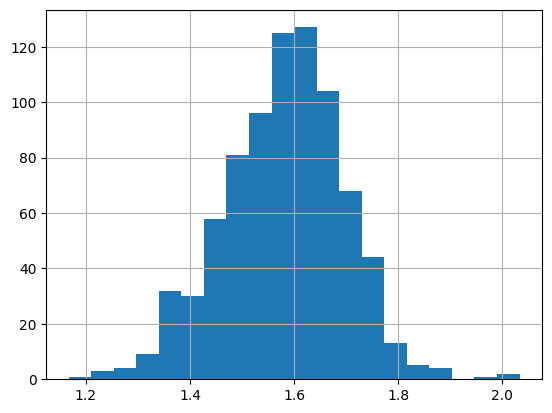

In [125]:
# get the latest dataset
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


last_dataset = drop_extreme_case(last_dataset, feature_names , thresh=0.01)
t1 = last_dataset

# remove NaN testcases
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)


# calculate score

predi_target = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']

#
##predi_target = predi_target * vol_filter.iloc[-1] #******加上量的濾網
predi_target = predi_target * (last_dataset['vol_ma5'] >vol).astype(float)



condition = (predi_target >= predi_target.nlargest(20).iloc[-1])
#vol_filter

# plot rank distribution
predi_target[predi_target!=0].hist(bins=20)


# show the best 20 stocks
slist1 = predi_target[condition].reset_index()['stock_id']

#https://keras-cn.readthedocs.io/en/latest/models/model/

In [126]:
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()

In [127]:
#rank.sort_values(ascending=False).head(20)

## 平均分配資產於股票之中

In [128]:
close = data.get("收盤價")

money = 60000
stock_prices = close[slist1].iloc[-1]


print("股票平分張數:")
money / len(stock_prices) / stock_prices / 1000


股票平分張數:


stock_id
2348    0.048154
2392    0.082759
2451    0.045249
2610    0.172911
2613    0.137931
2618    0.114723
3211    0.040595
3236    0.121704
3305    0.072029
3596    0.029703
3645    0.093750
4116    0.046154
4417    0.081522
5321    0.046440
5471    0.061162
5608    0.125261
6122    0.193548
8027    0.054645
8111    0.185185
8155    0.025862
Name: 2022-11-24 00:00:00, dtype: float64

##########################
#https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/61b4c90147843d0006cf2593
#移動窗格最佳化

In [131]:
import lightgbm as lgb

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

def select(df):

    rank = df['pre']

    condition1 = (rank >= rank.nlargest(1).iloc[-1])

    return df['return'][condition1].mean() * (1-3/1000-1.425/1000*2*0.6)

end = 5

cf = lgb.LGBMRegressor(n_estimators=500)



train_time = ['2015','2016','2017','2018','2019']

s_time = ['2007','2008','2009','2010','2011']

test_time = ['2016','2017','2018','2019','2020']

#dataset_copy = dataset_dropna.copy()

store_mse = []


for time in range(end):

    print('%d 次執行中'%(time))

    dataset_dropna2_train = dataset_copy.loc[s_time[time]:train_time[time]] #2007~ 2015   2008~2016   2009~2017  2010~2018  ....

    dataset_dropna2_test = dataset_copy.loc[test_time[time]:test_time[time]]#            2016                2017               2018              2019  .....

    
 cf.fit(dataset_dropna2_train[feature_names].astype(float), dataset_dropna2_train['rank'])

    
 predict = cf.predict(dataset_dropna2_test[feature_names])

    dataset_dropna2_test['pre'] = predict

dates = dataset_dropna2_test.index.get_level_values('date')

b = dataset_dropna2_test.groupby(dates).apply(select).cumprod()

s0050 = close['0050'][test_time[time]:test_time[time]]

s0056 = close['0056'][test_time[time]:test_time[time]]

pd.DataFrame({'Best 1 stocks return(include handling fee)':b.reindex(s0050.index, method='ffill'), 

              '0050':s0050/s0050[0],'0056':s0056/s0056[0]}).plot()

plt.ylabel('return')

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 45)